# Tasks

- Amgad

    - Segment Num and Cat types

        - Under Num show the 3Ms and std using table of figures

            - Skewness using mean and median and visualize

        - Under Cat bar instead of pie

            - Mention what type of cat is the feature nominal vs ordinal 

    - Treating Missing Values

        - Show the 3 Methods

- Fawzy

    - Intro to Outliers

    - Why should we encode

    - Which type to use and when

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Reading the Dataset
df = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')

# **Feature Description**

1. **longitude**: A measure of how far west a house is; a higher value is farther west

2. **latitude**: A measure of how far north a house is; a higher value is farther north

3. **housingMedianAge**: Median age of a house within a block; a lower number is a newer building

4. **totalRooms**: Total number of rooms within a block

5. **totalBedrooms**: Total number of bedrooms within a block

6. **population**: Total number of people residing within a block

# **Data Overview**

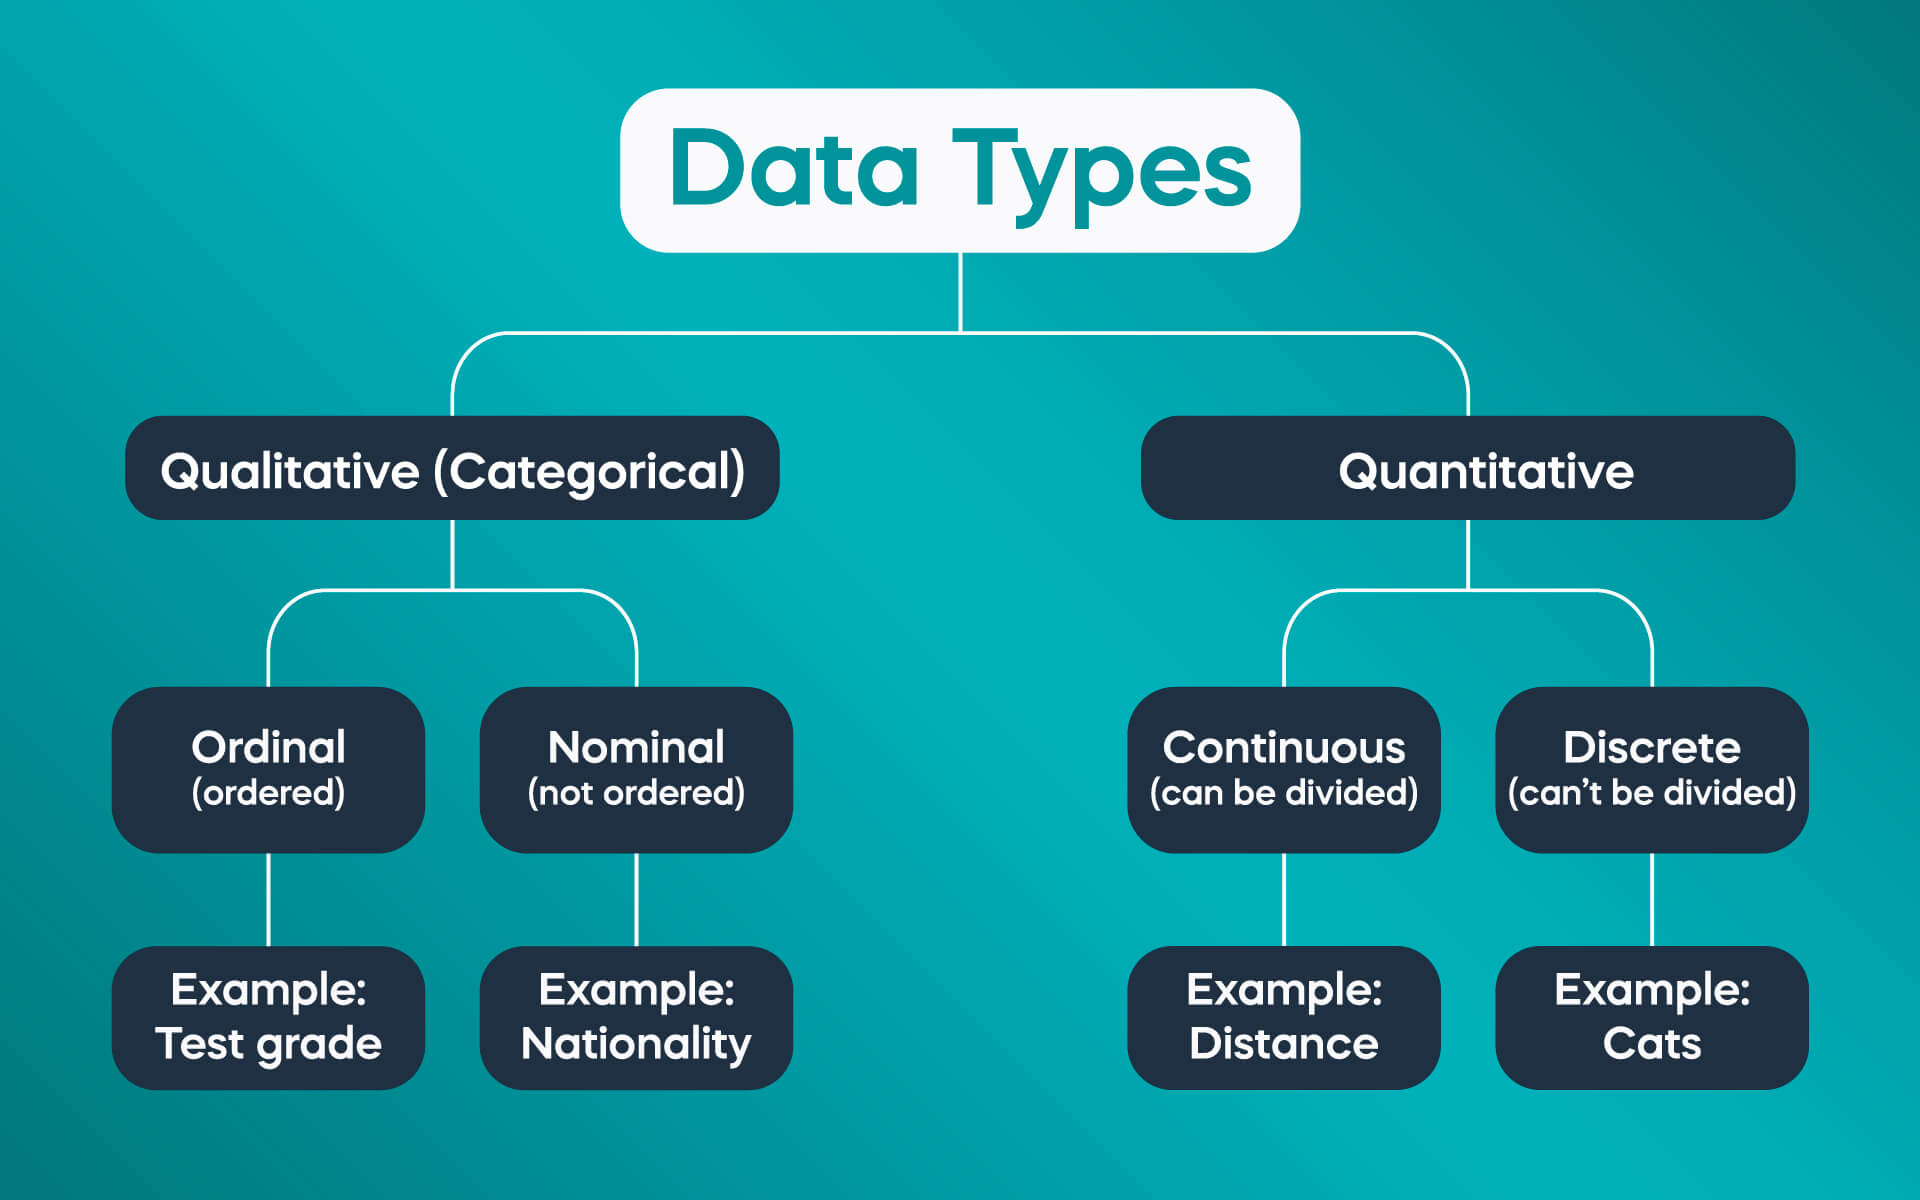

### **Qualitative (Categorical)**

*    Ordinal (ordered) – Data with a meaningful order or ranking.
        - Example: Test grade (A+ , A , B , B+)
*    Nominal (not ordered) – Data without a particular order or ranking.
        - Example: Nationality (Egyptian , American)

### **Quantitative (Numerical)**

*    Continuous (can be divided) – Data that can take any value within a range and be subdivided.
        - Example: Distance (1342.12)
*    Discrete (can’t be divided) – Data that consists of distinct or separate values.
        - Example: Number of Cats (3)

In [3]:
# Taking a quick look at the first 5 rows of the data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.shape # 20640 sample and 10 features

(20640, 10)

## **Getting Feature Statistics**

### **Numerical**

In [5]:
# Looking at some statistics for the Numerical Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


- in total_rooms it seems that data is slightly right skewed

- in total_bedrooms it seems that data is right skewed

- population is slightly right skewed



plotting will help us to be confident

### **Categorical**

In [6]:
# Looking at some statistics for the Categorical Data
df.describe(include='O')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [7]:
# Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# Getting the percentage of null values for each feature
(df.isna().sum() / df.shape[0]) * 100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

## **Handling Missing Values**
In the real world the data has many issues, one of then is `missing values`.

**What are missing values?**  
Data points in a dataset that are not recorded or available.

**Represented as:** `NaN`, `None`.

**Why there are missing values?**  

- Non-responses (`wasn't recorded` -> `Guess & Fill`):  
![alt text](blobs/non-response.png)  
Here the question is `optional`, so i may choose to not respond.

- Related-Columns (`doesn't exist` -> `Fill with something like not-available or not-exist`):  
![alt text](blobs/related-cols.png)  
*Note: Fireplaces: Number of fireplaces*,
*FireplaceQu: Fireplace quality*  

    Here we have two columns that are related in some way. That's if there is no `FirePlaces` (aka Fireplaces=0), then there is no mean to `FireplaceQu` (aka FireplaceQu=NaN).

**Important Note:** For dealing with missing values, you'll need to use your intuition to figure out why the value is missing (we will se examples later).

![alt text](blobs/handling_missing_values.jpg)

*This isn't a general guideline but one that we will use for now.* 
- Here are some resources that provide more robust ways to hand missing values:
    - [How to Handle Missing Data | Machine learning | Data science](https://ursmaheshj.medium.com/effective-strategies-for-handling-missing-data-a215056a07e3)
    - [A Guide to Handling Missing values in Python](https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python)

No let's explore a data some missing values!

In [3]:
# Load training data
df_train = pd.read_csv('https://raw.githubusercontent.com/FCAI-CU-AI-Community/Data/refs/heads/main/House-Prices/train.csv?token=GHSAT0AAAAAACUNF3ZR4GN5DVATK6K3ZT52ZY2ICCA')
# Load testing data
df_test = pd.read_csv('https://raw.githubusercontent.com/FCAI-CU-AI-Community/Data/refs/heads/main/House-Prices/test.csv?token=GHSAT0AAAAAACUNF3ZQ32LQCKMROWSTB4GWZY2ICKA')

In [4]:
# Show first few columns
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# data set shape
df_train.shape

(1460, 81)

Let's explore the columns

In [6]:
# all columns
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Count Null Values

In [14]:
# How many nulls in train data?
print(f"Null count in train: {df_train.isna().sum().sum()}")
print(f"Null count in test: {df_test.isna().sum().sum()}")

Null count in train: 7829
Null count in test: 7878


More nulls in test than train, we can handle the train first along with the test and then handle the remaining in test.

In [15]:
# Null values in each column
df_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

This is not helping a lot, let's visualize it!

In [24]:
# Putting the missing values in a data frame
missing_sum = list(df_train.isna().sum())
lst = []
for col_name, cnt in zip(df_train.columns, missing_sum):
    lst.append((col_name, cnt))

# Extract for columns with missing values only (count > 0)
lst = [x for x in lst if x[1] > 0]

missing_vals_df = pd.DataFrame(data=lst, columns=['column_name', 'null_count'])
missing_vals_df = missing_vals_df.sort_values(by='null_count', ascending=False)
missing_vals_df

,column_name,null_count
16,PoolQC,1453
18,MiscFeature,1406
1,Alley,1369
17,Fence,1179
2,MasVnrType,872
10,FireplaceQu,690
0,LotFrontage,259
11,GarageType,81
12,GarageYrBlt,81
13,GarageFinish,81


Seems we have a lot of missing values, let's see the percentage of missing values proportional to the total number of values.

In [41]:
# Percentage of missing values in each column
(df_train.isna().sum().sum() / (df_train.shape[0] * df_train.shape[1])) * 100

np.float64(6.325892102147809)

That's a lot, let's see the columns with missing values visually.

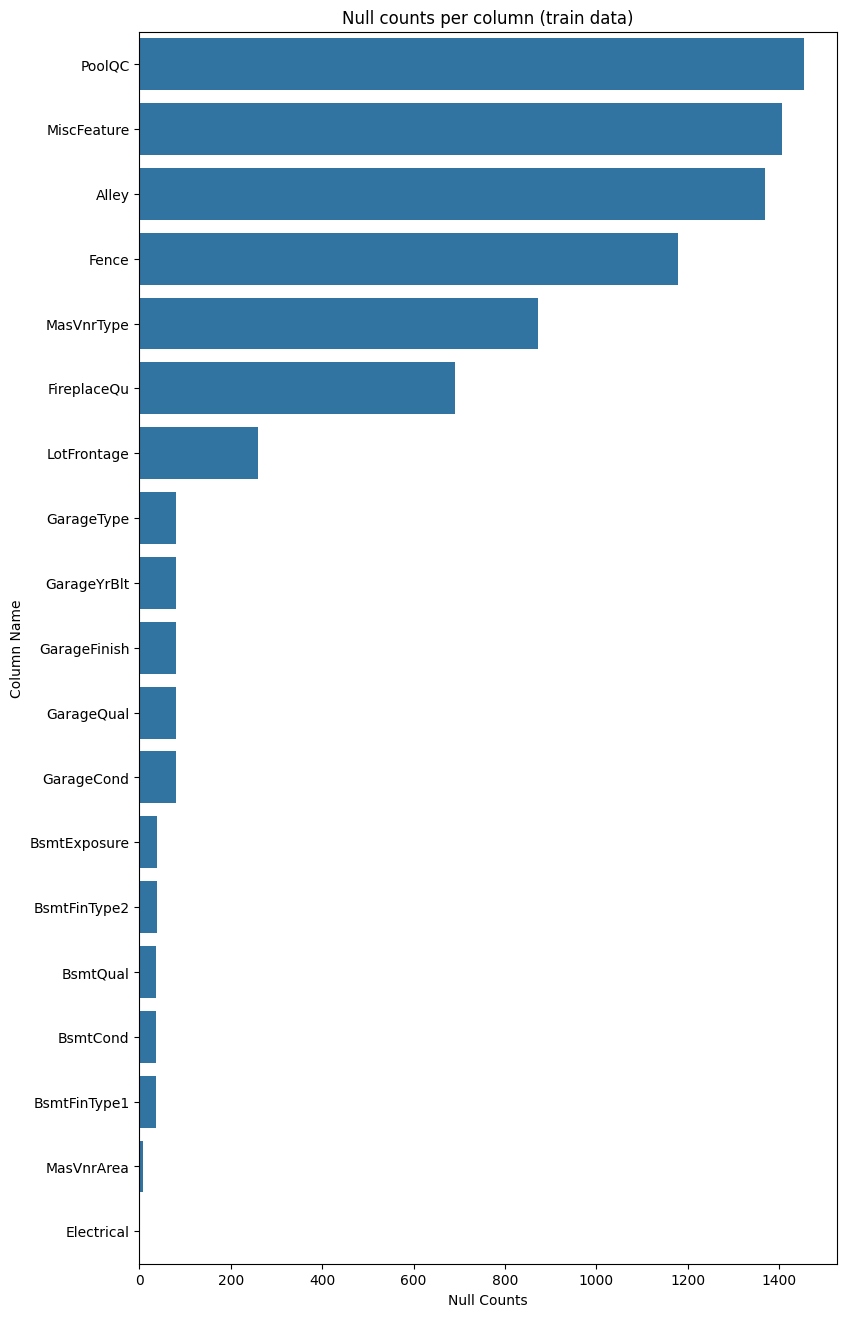

In [25]:
# Let's visualize the missing values
plt.figure(figsize=(9, 16))
plt.clf()
plt.title('Null counts per column (train data)')
plt.xlabel('Null Counts')
plt.ylabel('Column Name')
sns.barplot(data=missing_vals_df, y='column_name', x='null_count')
plt.show()

In [23]:
# How many features have missing values
n_nulls_train = len([1 for val in list(df_train.isna().sum()) if val > 0])
n_nulls_test = len([1 for val in list(df_test.isna().sum()) if val > 0])

print(f"Number of features have nulls in 'training' data: {n_nulls_train}")
print(f"Number of features have nulls in 'testing' data : {n_nulls_test}")

Number of features have nulls in 'training' data: 19
Number of features have nulls in 'testing' data : 33


More columns (features) have missing values in testing.  
We can handle the train first, and then handle the remaining in testing

### Numerical Values

In [32]:
# Extract the numerical features to deal with first
missing_vals_num = [col for col in missing_vals_df['column_name'] if df_train[col].dtype in [float, int]]
missing_vals_num

['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

#### **Filling Null values (numerical)**

These columns are numerical and have missing values, let's describe them and see how can we fill the missing values in them.

In [34]:
# Extract these columns from the train data
missing_vals_num_df = df_train[missing_vals_num].head()
missing_vals_num_df

,LotFrontage,GarageYrBlt,MasVnrArea
0,65.0,2003.0,196.0
1,80.0,1976.0,0.0
2,68.0,2001.0,162.0
3,60.0,1998.0,0.0
4,84.0,2000.0,350.0


In [35]:
# describe these columns
missing_vals_num_df.describe()

,LotFrontage,GarageYrBlt,MasVnrArea
count,5.000000,5.000000,5.000000
mean,71.400000,1995.600000,141.600000
std,10.188229,11.104053,147.400136
min,60.000000,1976.000000,0.000000
25%,65.000000,1998.000000,0.000000
50%,68.000000,2000.000000,162.000000
75%,80.000000,2001.000000,196.000000
max,84.000000,2003.000000,350.000000


Look at the mean and median to decide how to fill the missing values.  
If the data is skewed, it's better to use the median.  
Let's see the boxplot of the data.  

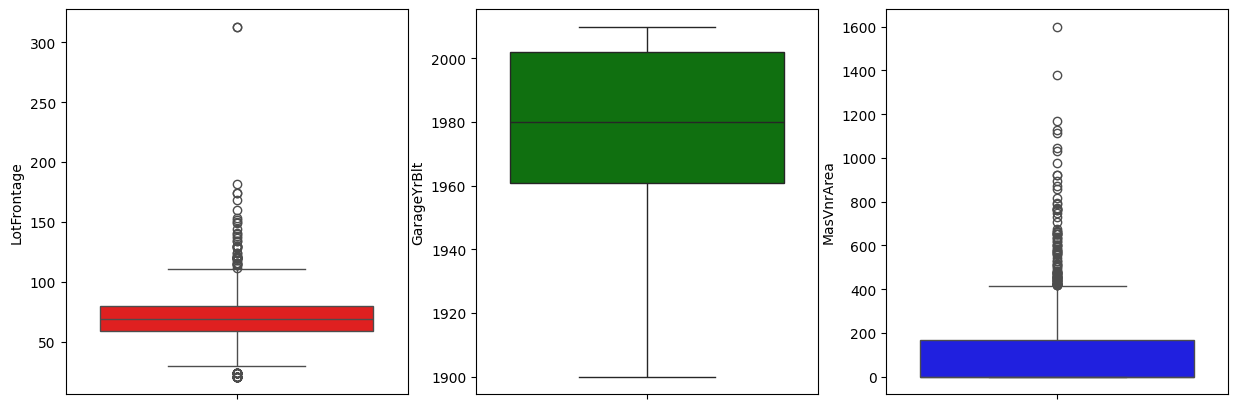

In [36]:
# Box plot for these columns
plt.figure(figsize=(15, 5))
plt.clf()
colors = ['red', 'green', 'blue']
for i in range(len(missing_vals_num)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df_train[missing_vals_num], y=missing_vals_num[i], color=colors[i])
plt.show()

There are outliers in `LotFrontage` and `MasVnrArea`, so it's better to use the median to fill the missing values.
but for `GarageYrBlt` it's we can use the mean.

In [38]:
# Fill missing values with the median, training data
df_train.fillna({'LotFrontage': df_train['LotFrontage'].median()}, inplace=True)
df_train.fillna({'MasVnrArea': df_train['MasVnrArea'].median()}, inplace=True)

# Fill missing values with the median, testing data
df_test.fillna({'LotFrontage': df_test['LotFrontage'].median()}, inplace=True)
df_test.fillna({'MasVnrArea': df_test['MasVnrArea'].median()}, inplace=True)


# Fill missing values with the mean, training data
df_train.fillna({'GarageYrBlt': df_train['GarageYrBlt'].mean()}, inplace=True)

# Fill missing values with the mean, testing data
df_test.fillna({'GarageYrBlt': df_test['GarageYrBlt'].mean()}, inplace=True)


# Check if the missing values are filled, training data
print("Training data")
display(df_train[missing_vals_num].isna().sum())

print("Testing data")
# Check if the missing values are filled, testing data
display(df_test[missing_vals_num].isna().sum())

Training data


LotFrontage    0
GarageYrBlt    0
MasVnrArea     0
dtype: int64

Testing data


LotFrontage    0
GarageYrBlt    0
MasVnrArea     0
dtype: int64

Yaay 🥳! We filled the missing values in the numerical columns.

### Categorical Values
Let's explore categorical values

In [44]:
# Extract categorical columns
df_train_cat = df_train.select_dtypes(include='O')
df_train_cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [65]:
# Extract the Categorical features to deal with first
missing_vals_cat = [col for col in missing_vals_df['column_name'] if df_train[col].dtype == 'object']
missing_vals_cat

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'MasVnrType',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'Electrical']

In [66]:
# Let's see how many values available in each column
for cat in missing_vals_cat:
    print((cat, df_train[cat].value_counts().sum().item()))

('PoolQC', 7)
('MiscFeature', 54)
('Alley', 91)
('Fence', 281)
('MasVnrType', 588)
('FireplaceQu', 770)
('GarageType', 1379)
('GarageFinish', 1379)
('GarageQual', 1379)
('GarageCond', 1379)
('BsmtExposure', 1422)
('BsmtFinType2', 1422)
('BsmtQual', 1423)
('BsmtCond', 1423)
('BsmtFinType1', 1423)
('Electrical', 1459)


First we can drop the columns having less values available, it's better to drop them than fill them with a value.

In [67]:
# Drop columns with too many missing values
df_train.drop(labels=['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1,  inplace=True)
df_test.drop(labels=['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1,  inplace=True)

Now we removed the columns with a lot of missing values, let's see the remaining columns.

let's see the relation between the columns with missing values and other columns.

In [68]:
df_train[df_train['FireplaceQu'].isnull()][['FireplaceQu', 'Fireplaces']]

,FireplaceQu,Fireplaces
0,NaN,0
5,NaN,0
10,NaN,0
12,NaN,0
15,NaN,0
...,...,...
1452,NaN,0
1453,NaN,0
1454,NaN,0
1458,NaN,0


The Fire Place Quality is missing for those place haven't Fire places. so let's create a new category of NotAvailable.

In [69]:
# Create a new category with not available values
df_train.fillna({'FireplaceQu': 'NotAvailable'}, inplace=True)
df_test.fillna({'FireplaceQu': 'NotAvailable'}, inplace=True)

In [70]:
# Check if the missing values are filled
df_train['FireplaceQu'].isna().sum()

np.int64(0)

Now let's explore the missing values in the Garage columns.

In [71]:
df_train[['GarageQual', 'GarageType', 'GarageFinish', 'GarageCond']].isnull().sum()

GarageQual      81
GarageType      81
GarageFinish    81
GarageCond      81
dtype: int64

Hmm! seems three columns are missing values in the same rows, let's see the relation between them.

In [72]:
df_train[df_train['GarageQual'].isnull()][['GarageArea', 'GarageQual', 'GarageType', 'GarageFinish', 'GarageCond']]

,GarageArea,GarageQual,GarageType,GarageFinish,GarageCond
39,0,NaN,NaN,NaN,NaN
48,0,NaN,NaN,NaN,NaN
78,0,NaN,NaN,NaN,NaN
88,0,NaN,NaN,NaN,NaN
89,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1349,0,NaN,NaN,NaN,NaN
1407,0,NaN,NaN,NaN,NaN
1449,0,NaN,NaN,NaN,NaN
1450,0,NaN,NaN,NaN,NaN


We can see that the missing values are for the same rows for which the `GarageArea` is `zero` means there is no garage , so we can fill them with a new category of No_Grg.

In [73]:
# Fill missing values with 'No_Grg'
Grg_fet = ['GarageQual', 'GarageType', 'GarageFinish', 'GarageCond']
for fet in Grg_fet:
    df_train.fillna({fet: 'No_Grg'}, inplace=True)
    df_test.fillna({fet: 'No_Grg'}, inplace=True)

In [74]:
# Check if the missing values are filled
df_train[['GarageQual', 'GarageType', 'GarageFinish', 'GarageCond']].isnull().sum()

GarageQual      0
GarageType      0
GarageFinish    0
GarageCond      0
dtype: int64

Now let's see the remaining columns with missing values.

In [75]:
# Extract the remaining Categorical features haven't null values to deal with first
missing_vals_cat = [col for col in df_train.columns.to_list() if df_train[col].dtype == 'object' and df_train[col].isna().sum() > 0]
missing_vals_cat

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical']

seems there is a relation between the missing values in the `Bsmt` columns.
let's Explore!!

In [76]:
# Count the number of missing values in Bsmt features
df_train[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isnull().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
dtype: int64

Looks like we have seen something like this before, seems like the missing values may be for the same rows.
Let's see the relation between the columns.

In [77]:
df_train[df_train['BsmtQual'].isnull()][['TotalBsmtSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]

,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,0,NaN,NaN,NaN,NaN,NaN
39,0,NaN,NaN,NaN,NaN,NaN
90,0,NaN,NaN,NaN,NaN,NaN
102,0,NaN,NaN,NaN,NaN,NaN
156,0,NaN,NaN,NaN,NaN,NaN
182,0,NaN,NaN,NaN,NaN,NaN
259,0,NaN,NaN,NaN,NaN,NaN
342,0,NaN,NaN,NaN,NaN,NaN
362,0,NaN,NaN,NaN,NaN,NaN
371,0,NaN,NaN,NaN,NaN,NaN


The null values are for the same rows, when there is no basement `TotalBsmtSF`=0, so we can fill them with a new category of No_Bsmt.

In [78]:
# Fill the null values for Bsmt features with `No_Bsmt`
bsmt_fet = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for fet in bsmt_fet:
    df_train.fillna({fet: 'No_Bsmt'}, inplace=True)
    df_test.fillna({fet: 'No_Bsmt'}, inplace=True)

In [79]:
# Check if the missing values are filled
df_train[bsmt_fet].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

Now let's see the remaining columns with missing values.

In [80]:
# Extract the remaining Categorical features haven't null values to deal with first
missing_vals_cat = [col for col in df_train.columns.to_list() if df_train[col].dtype == 'object' and df_train[col].isna().sum() > 0]
missing_vals_cat

['MasVnrType', 'Electrical']

Next we will explore the `MasVnr` missing values.

Let's see the relation between the columns, why there is missing values in `MasVnrType`.
Is it because there is no `MasVnrArea`?  
Let's see!

In [81]:
df_train[df_train['MasVnrType'].isnull()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
1,NaN,0.0
3,NaN,0.0
5,NaN,0.0
8,NaN,0.0
9,NaN,0.0
...,...,...
1454,NaN,0.0
1455,NaN,0.0
1457,NaN,0.0
1458,NaN,0.0


Yes, the missing values in `MasVnrType` are for the same rows for which the `MasVnrArea` is `zero`, so we can fill them with a new category of No_MasVnr.

In [82]:
# Fill the missing values with `No_MasVnr`
df_train.fillna({'MasVnrType': 'No_MasVnr'}, inplace=True)
df_test.fillna({'MasVnrType': 'No_MasVnr'}, inplace=True)

In [83]:
# Check if the missing values are filled
df_train['MasVnrType'].isnull().sum()

np.int64(0)

Now let's see the remaining columns with missing values.

In [84]:
# Extract the remaining Categorical features haven't null values to deal with first
missing_vals_cat = [col for col in df_train.columns.to_list() if df_train[col].dtype == 'object' and df_train[col].isna().sum() > 0]
missing_vals_cat

['Electrical']

Exploring the `Electrical` feature.

In [85]:
df_train['Electrical'].head()

0    SBrkr
1    SBrkr
2    SBrkr
3    SBrkr
4    SBrkr
Name: Electrical, dtype: object

First insights about the `Electrical` feature:
- It's a categorical feature.
- Not having columns related to it directly, se we need to explore it alone.

We can fill the missing values with the most frequent value, so let's explore the values count.

In [86]:
# See the most frequent value in the column.
df_train['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [87]:
# We can check the mode value in the column.
df_train['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

Wow! seems that the `SBrkr` is the most frequent value, so we can fill the missing values with it.

In [88]:
# Fill the missing values with the most frequent value
df_train.fillna({'Electrical': 'SBrkr'}, inplace=True)
df_test.fillna({'Electrical': 'SBrkr'}, inplace=True)

In [89]:
# Check if the missing values are filled
df_train['Electrical'].isnull().sum()

np.int64(0)

Now let's see the remaining columns with missing values.

In [90]:
# Extract the features with missing values
missing_cols = [col for col in df_train.columns.to_list() if df_train[col].isna().sum() > 0]
missing_cols

[]

In [92]:
# How many missing values in total, training data
df_train.isnull().sum().sum()

np.int64(0)

Yaay 🥳! We have filled the missing values in all the training data.

In [93]:
# How many missing values in total, testing data
df_test.isnull().sum().sum()

np.int64(22)

Hmm! seems we have some missing values in the testing data, let's see them. Fill then yourself!

## **Scenario 1 Drop Column**

In [9]:
try1 = df.copy()

try1 = try1.drop(columns=['total_bedrooms'])

try1.head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
try1.shape

(20640, 9)

## **Scenario 2 Impute Column with Mean**

In [11]:
try2 = df.copy()

try2['total_bedrooms'] = np.mean(try2['total_bedrooms'])

In [12]:
try2.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## **Scenario 3 Drop Rows with Nulls**

In [13]:
df.dropna(inplace=True)

In [14]:
(df.isna().sum() / df.shape[0]) * 100

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

In [15]:
df.duplicated().sum()

0

# **Univariate Analysis**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


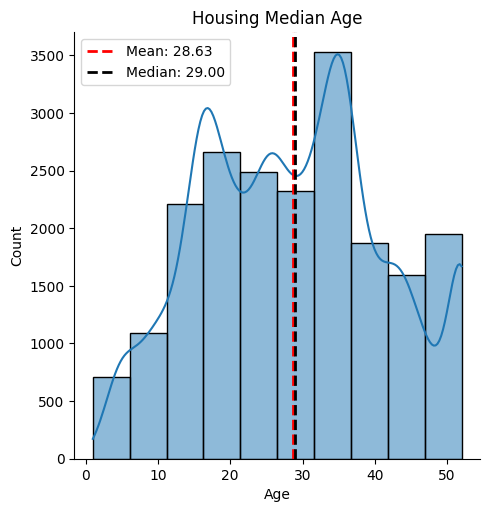

In [16]:
sns.displot(df, x='housing_median_age', kde=True, bins=10)

plt.title('Housing Median Age')

plt.xlabel('Age')

plt.ylabel('Count')

mean = np.mean(df['housing_median_age'])

median = np.median(df['housing_median_age'])

plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

plt.axvline(median, color='black', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')

plt.legend()

plt.show()

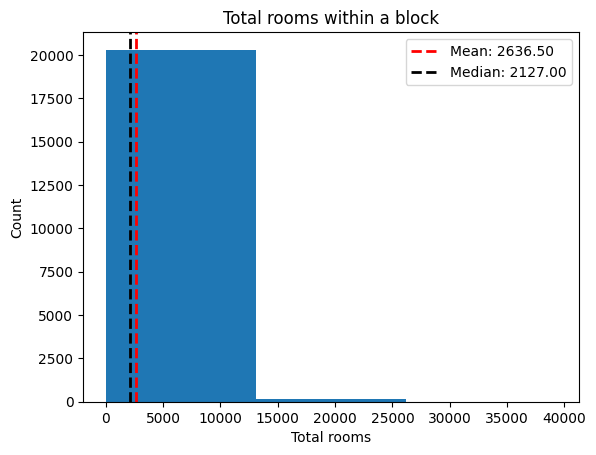

In [17]:
plt.hist(df['total_rooms'], bins=3)
plt.title('Total rooms within a block')

plt.xlabel('Total rooms')
plt.ylabel('Count')

mean = np.mean(df['total_rooms'])
median = np.median(df['total_rooms'])
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='black', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')

plt.legend()
plt.show()

#### As clearly shown Total rooms are right skewed (meaning the tail is in the right)

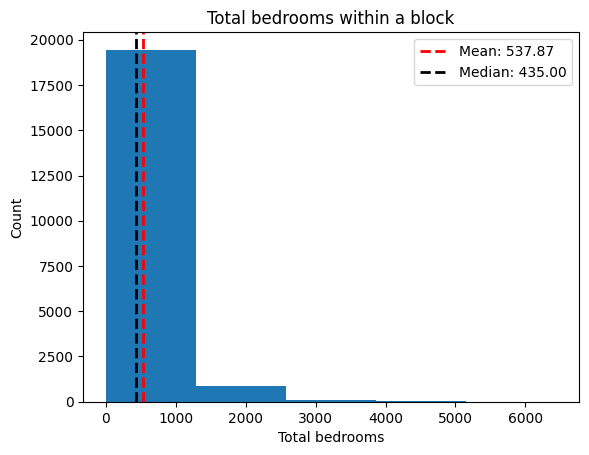

In [18]:
plt.hist(df['total_bedrooms'], bins=5)
plt.title('Total bedrooms within a block')

plt.xlabel('Total bedrooms')
plt.ylabel('Count')

mean = np.mean(df['total_bedrooms'])
median = np.median(df['total_bedrooms'])
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='black', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')

plt.legend()
plt.show()

#### Same thing with Total Bedrooms : right skewed

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


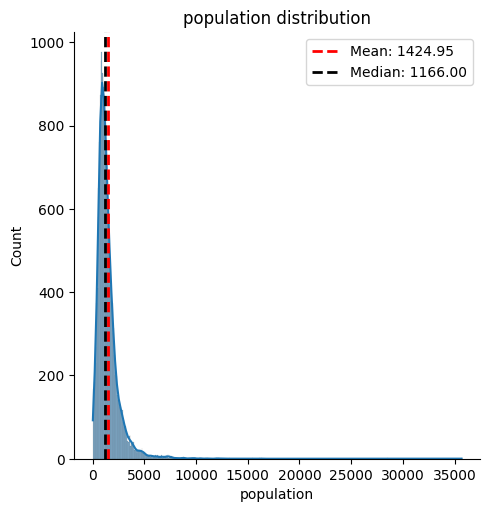

In [19]:
sns.displot(df, x='population', kde=True)
plt.title('population distribution')

mean = np.mean(df['population'])
median = np.median(df['population'])
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='black', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')

plt.legend()
plt.show()

#### Same thing here too : right skewed

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


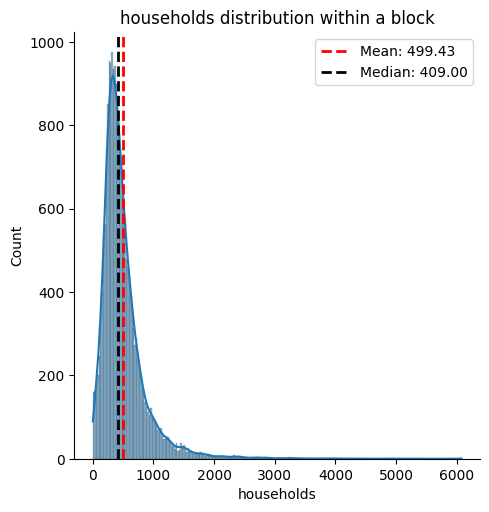

In [20]:
sns.displot(df, x='households', kde=True)

plt.title('households distribution within a block')

mean = np.mean(df['households'])

median = np.median(df['households'])

plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

plt.axvline(median, color='black', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')

plt.legend()

plt.show()

#### Same thing here too: right skewed

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


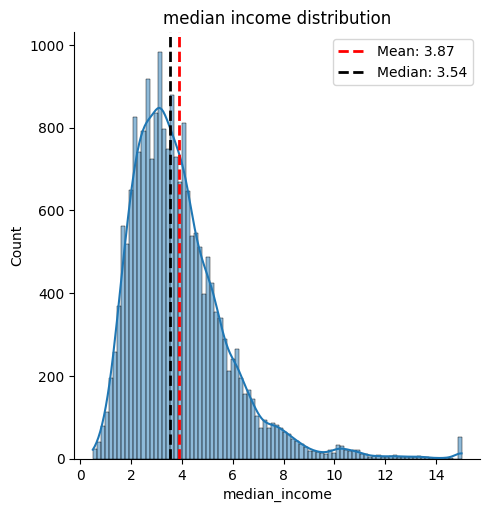

In [21]:
sns.displot(df, x='median_income', kde=True)

plt.title('median income distribution')

mean = np.mean(df['median_income'])

median = np.median(df['median_income'])

plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

plt.axvline(median, color='black', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')

plt.legend()

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


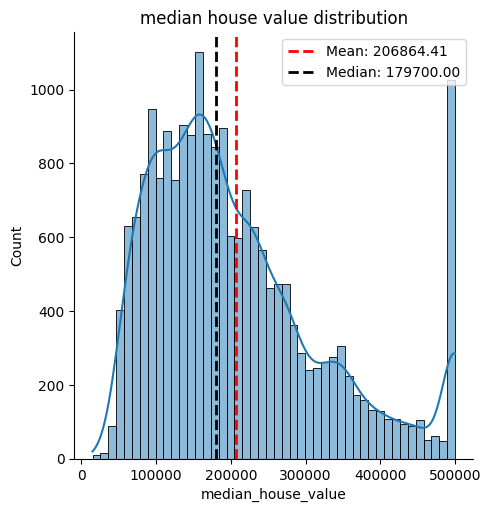

In [22]:
sns.displot(df, x='median_house_value', kde=True)
plt.title('median house value distribution')

mean = np.mean(df['median_house_value'])
median = np.median(df['median_house_value'])
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='black', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')

plt.legend()
plt.show()

#### Same thing here too : right skewed

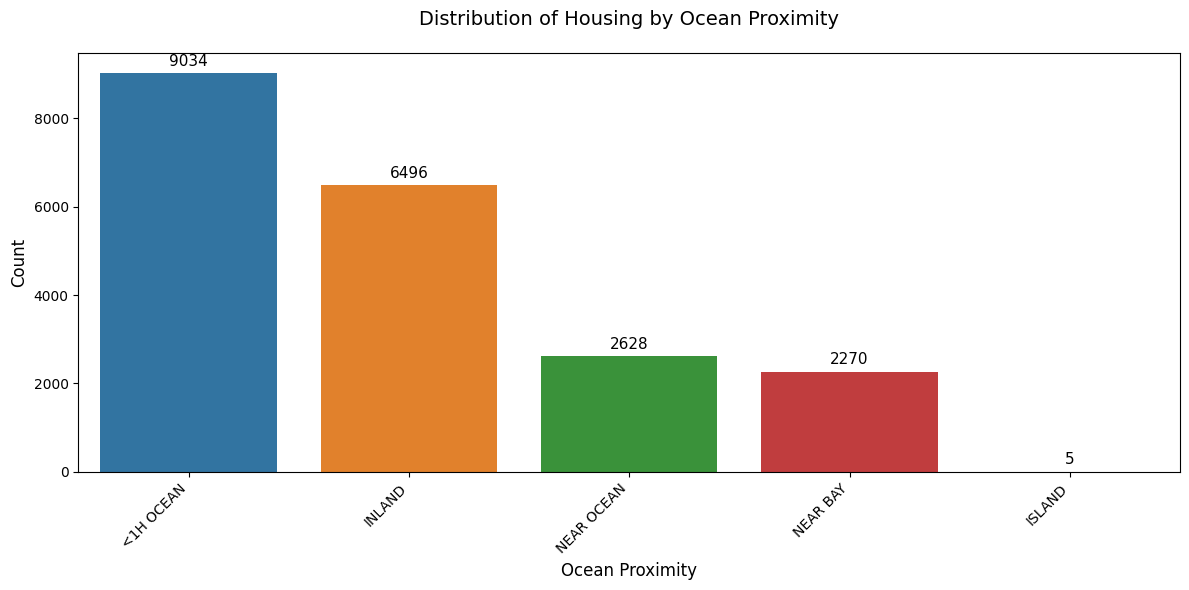

In [23]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(data=df, x='ocean_proximity', 
                  order=df['ocean_proximity'].value_counts().index)

for i in ax.containers:
    ax.bar_label(i, padding=3, fontsize=11)

plt.title('Distribution of Housing by Ocean Proximity', pad=20, fontsize=14)
plt.xlabel('Ocean Proximity', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

# **Bivariate Analysis**

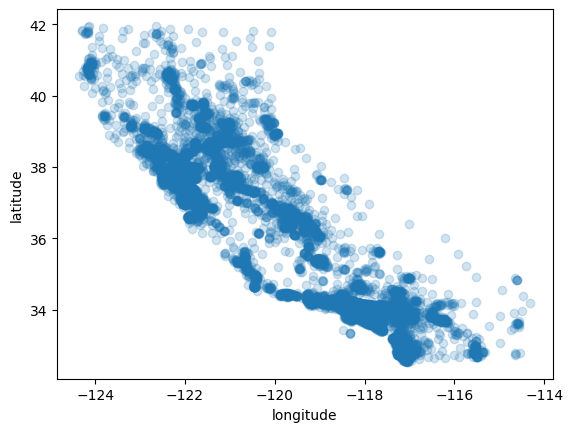

In [24]:
plt.scatter(df['longitude'], df['latitude'], alpha=0.2)

plt.xlabel('longitude')

plt.ylabel('latitude')

plt.show()

Hehe looks like california :))

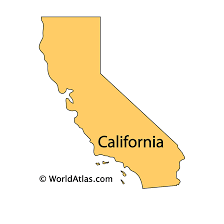

In [25]:
def compare_feature_with_price(feature):
    plt.scatter(df[feature], df['median_house_value'])

    plt.xlabel(feature)
    plt.ylabel('median_house_value')

    plt.title(f'{feature} vs median_house_value')
    plt.show()    

#### We are going to compare each feature with the median house value to check if there is any relation between the looked at features.

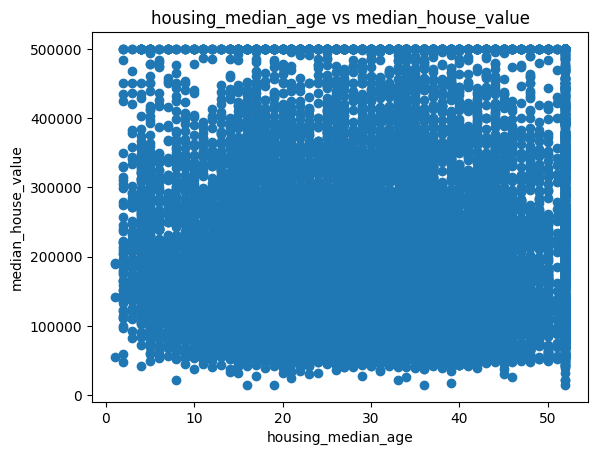

In [26]:
compare_feature_with_price('housing_median_age')

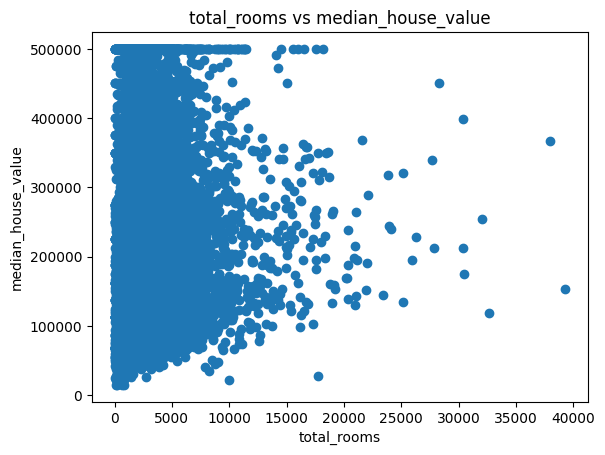

In [27]:
compare_feature_with_price('total_rooms')

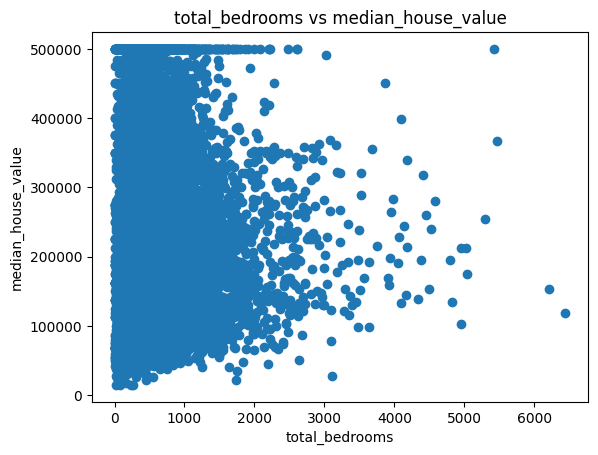

In [28]:
compare_feature_with_price('total_bedrooms')

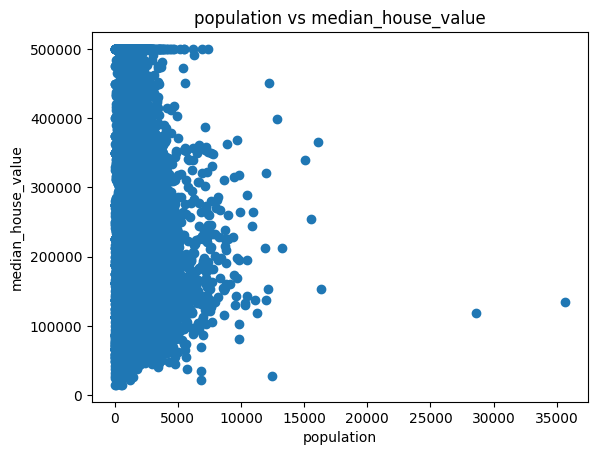

In [29]:
compare_feature_with_price('population')

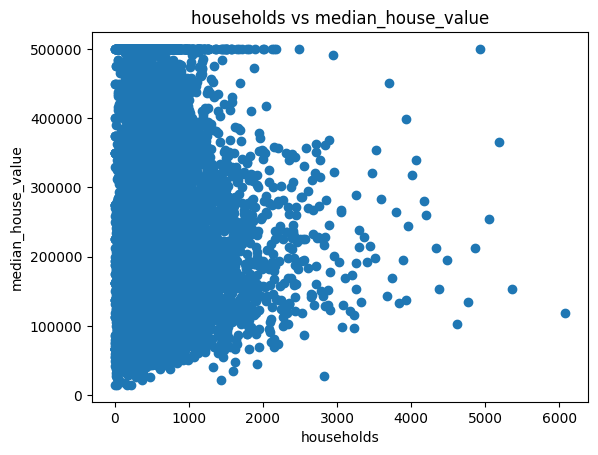

In [30]:
compare_feature_with_price('households')

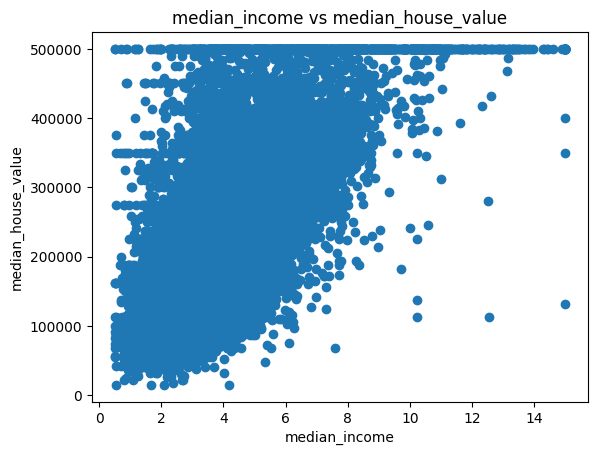

In [31]:
compare_feature_with_price('median_income')

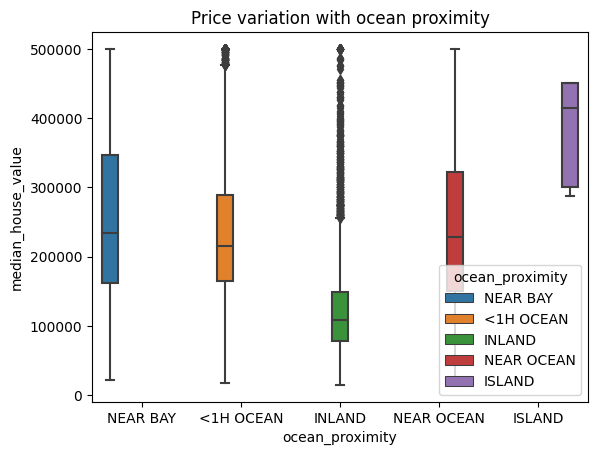

In [32]:
sns.boxplot(data=df, x='ocean_proximity', y='median_house_value', hue='ocean_proximity')

plt.title('Price variation with ocean proximity')

plt.show()

# **Outliers**

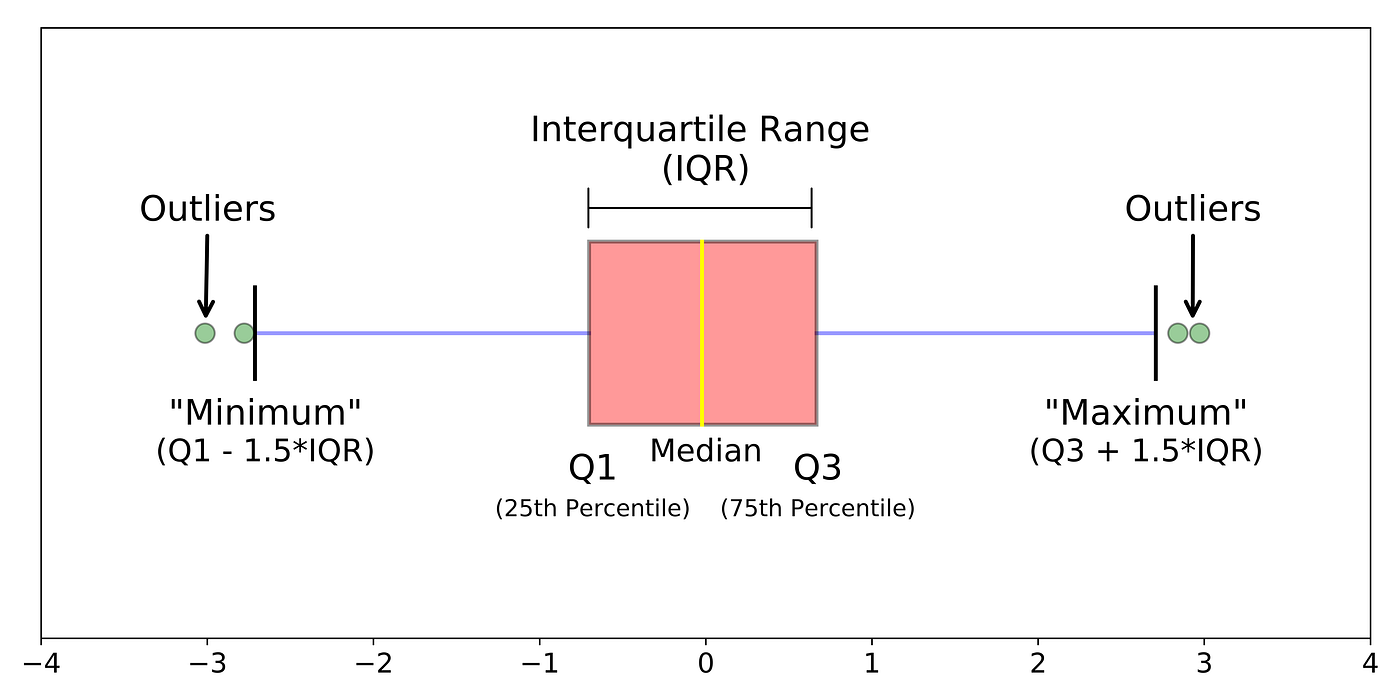

**Outliers** are data points that significantly differ from the other observations in a dataset. They are either much larger or much smaller than the majority of the data, and they can arise due to variability in the data, measurement errors, or other factors. **Outliers** can affect the results of data analysis, especially in methods like regression or clustering, so identifying and handling them is an important step in data preprocessing.

#### Investigating if there are any outliers in the data

In [33]:
def boxplot(df, feature):

    sns.boxplot(data=df, x='housing_median_age')

    plt.title(f'{feature} boxplot')

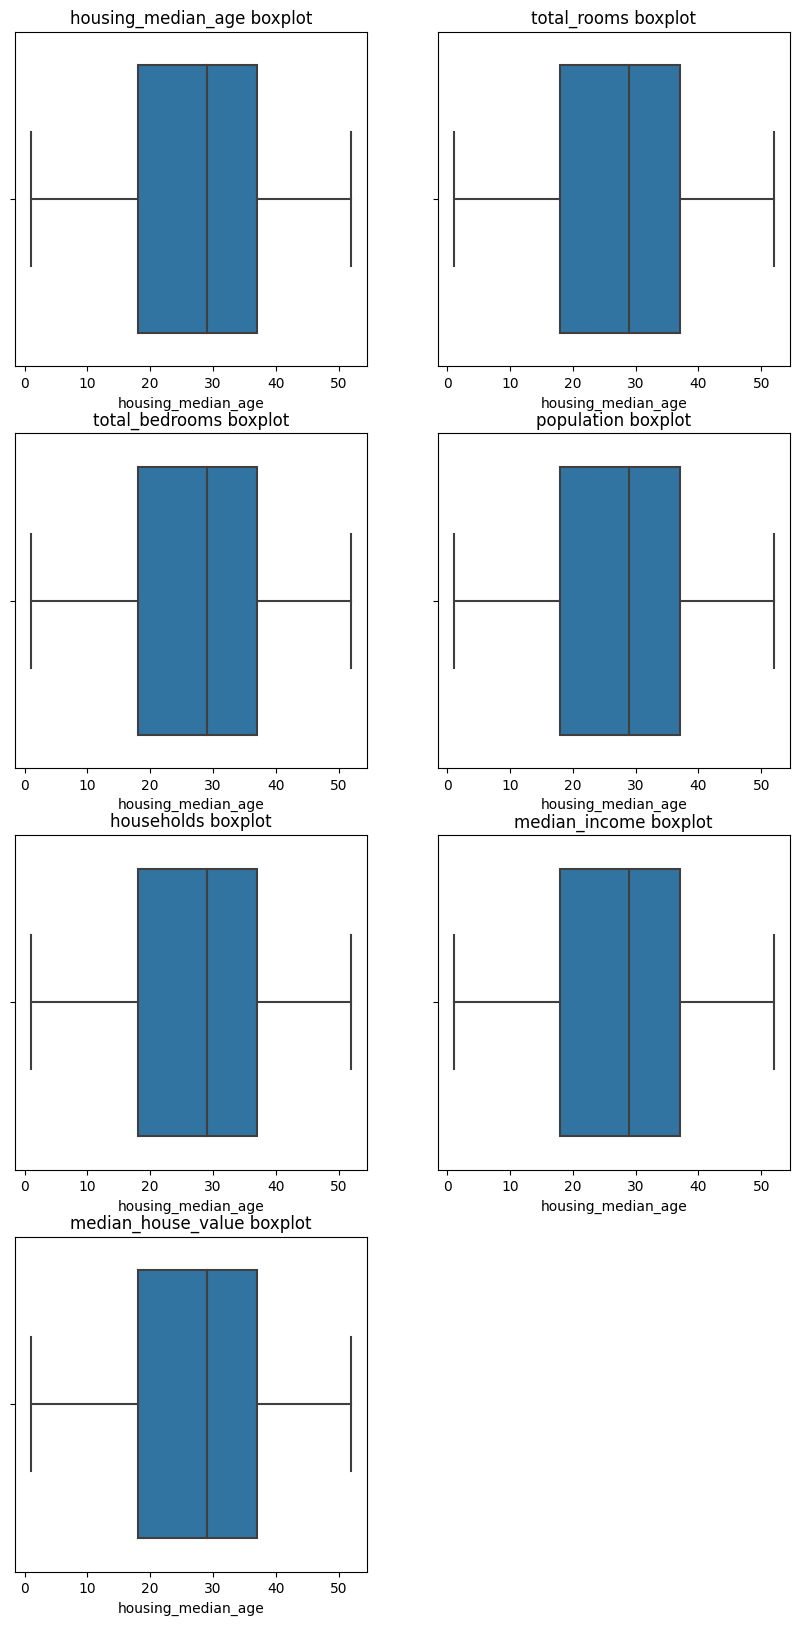

In [34]:
cols = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

plt.figure(figsize=(10, 20))

for i, col in enumerate(cols):

    plt.subplot(4, 2, i+1)

    boxplot(df, col)

#### There are none. Thankfully <3

# **Handling Skewness**

#### **Why are we handling skewness ?**

Highly skewed data often contains extreme outliers that can distort models and analyses. Log transformation or other methods reduce the impact of extreme values, making the data more balanced and less prone to the influence of outliers.

In [35]:
skeweed_cols = ['population', 'households', 'median_income', 'median_house_value']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

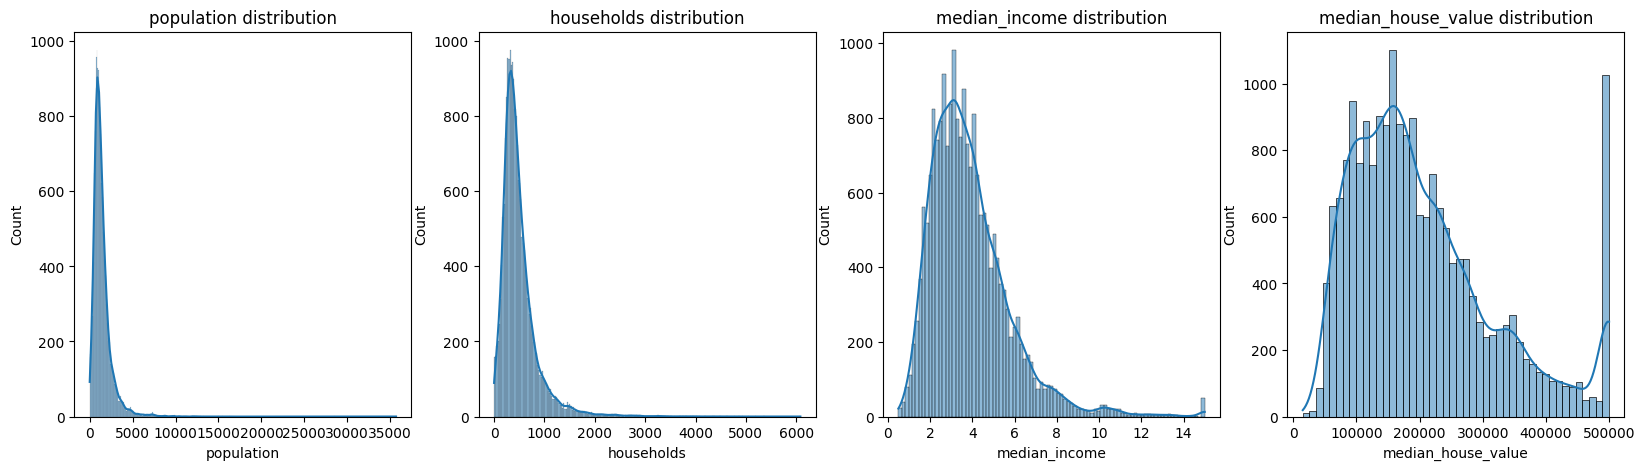

In [36]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, col in enumerate(skeweed_cols):

    axs[i].set_title(f'{col} distribution')

    sns.histplot(df, x=col, kde=True, ax=axs[i])

In [37]:
for col in skeweed_cols:

    df[col] = np.log(df[col] + 1)

We can use many techniques to handle skewness as:

1. log transform

2. root transform

3. PowerTransformer in scikit-learn

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

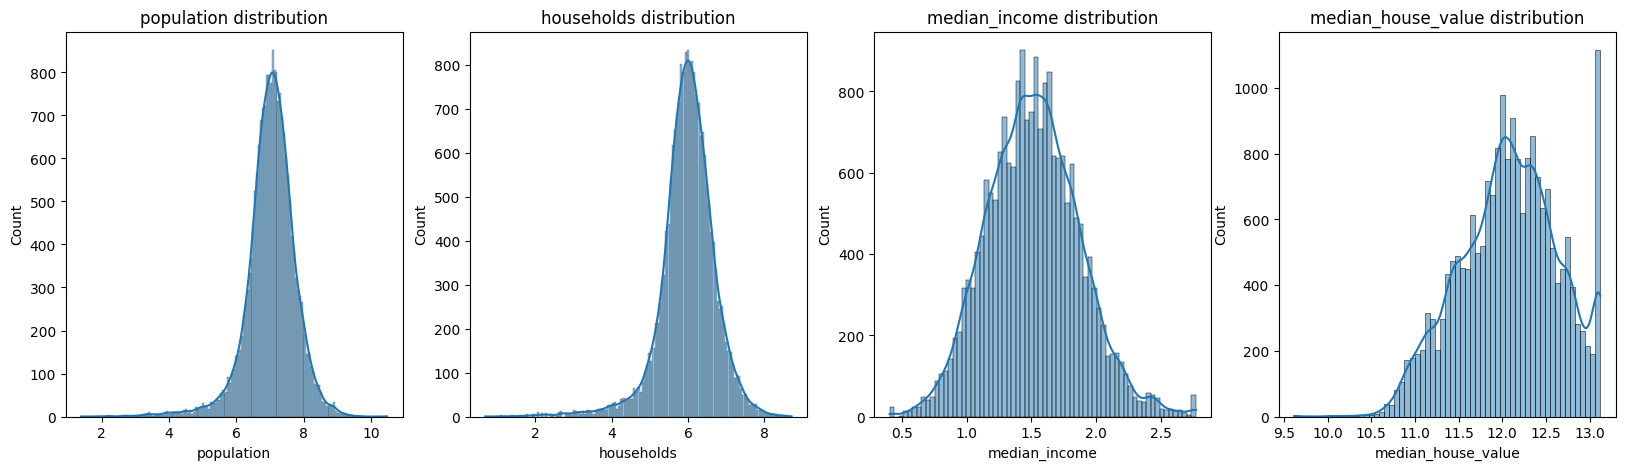

In [38]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, col in enumerate(skeweed_cols):

    axs[i].set_title(f'{col} distribution')

    sns.histplot(df, x=col, kde=True, ax=axs[i])

# **Encoding**

*We will get into later on why we need encoding when we start learning how to train models.*

In [39]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

## **Label Encoding**

In [40]:
from sklearn.preprocessing import LabelEncoder



le = LabelEncoder()

df['ocean_proximity_encoded'] = le.fit_transform(df['ocean_proximity'])

In [41]:
df['ocean_proximity_encoded'].value_counts()

ocean_proximity_encoded
0    9034
1    6496
4    2628
3    2270
2       5
Name: count, dtype: int64

##  **One-hot Encoding**

In [42]:
from sklearn.preprocessing import OneHotEncoder



ohe = OneHotEncoder(sparse_output=False)

ohe.fit(df[['ocean_proximity']])

encoded_cols = ohe.get_feature_names_out()

df[encoded_cols] = ohe.transform(df[['ocean_proximity']])

In [43]:
df[encoded_cols]

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


## **Ordinal Encoding**

It use when feature has some order within values.

ex: classes in airplane can be `Economy`, `Business`

Since our categorical data here is nominal, we don't need to use it.

# **Data Scaling**

*We will get into later on why we need data scaling when we start learning how to train models.*

### **Types of Scaling**:



$StandardScaler(x) = \frac{x - μ}{σ}$

- Standard Scaler suitable when data not suffer from outliers.

$MinMaxScaler(x) = \frac{x - x_{min}}{x_{max} - x_{min}}$

- MinMax scaler when you want your values to be positive as its value ranges from 0 to 1.

$RobustScaler(x) = \frac{x - median}{IQR}\ ; IQR = Q_3 - Q_1$

- Robust Scaler suitable when data contain outliers

In [44]:
df = df.drop(columns=encoded_cols)

df = df.drop(columns='ocean_proximity')

cols = df.columns

In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler



standardscaler = StandardScaler()

minmaxscaler = MinMaxScaler()

robustscaler = RobustScaler()



df_standardscaler = standardscaler.fit_transform(df)

df_minmaxscaler = minmaxscaler.fit_transform(df)

df_robustscaler = robustscaler.fit_transform(df)

In [46]:
df_standardscaler = pd.DataFrame(df_standardscaler, columns=cols)

df_minmaxscaler = pd.DataFrame(df_minmaxscaler, columns=cols)

df_robustscaler = pd.DataFrame(df_robustscaler, columns=cols)

In [47]:
df_standardscaler.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_encoded
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-1.694198,-1.568921,1.995330,1.647734,1.291351
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,1.030718,1.449247,1.988205,1.238251,1.291351
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-1.108938,-1.104448,1.656240,1.206604,1.291351
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.949279,-0.812988,1.049692,1.151873,1.291351
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.932378,-0.583151,0.170299,1.156500,1.291351


In [48]:
df_minmaxscaler.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_encoded
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.482772,0.517579,0.771935,0.971596,0.75
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.703350,0.791107,0.770856,0.905126,0.75
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.530148,0.559673,0.720562,0.899989,0.75
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.543072,0.586087,0.628668,0.891105,0.75
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.544440,0.606916,0.495437,0.891856,0.75


In [49]:
df_robustscaler.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_encoded
0,-0.986807,0.955145,0.631579,-0.736562,-0.871795,-1.641953,-1.528244,1.509489,1.161504,2.0
1,-0.984169,0.949868,-0.421053,2.936799,1.911681,0.922719,1.332356,1.504136,0.868424,2.0
2,-0.989446,0.947230,1.210526,-0.389841,-0.698006,-1.091110,-1.088019,1.254731,0.845774,2.0
3,-0.992084,0.947230,1.210526,-0.503839,-0.569801,-0.940840,-0.811776,0.799032,0.806601,2.0
4,-0.992084,0.947230,1.210526,-0.295334,-0.441595,-0.924933,-0.593938,0.138343,0.809912,2.0
